## Sorting Algorithms Application: Greedy Algorithms
-------

Optimization problems ask you to find a solution which maximizes or minimizes some objective functions. 
**Greedy algorithms** adopt a natural approach to find a optimal solution.

Mentioning Wikipedia:
*A greedy algorithm is any algorithm that follows the problem-solving heuristic of making the locally optimal choice at each stage. In many problems, a greedy strategy does not usually produce an optimal solution, but nonetheless, a greedy heuristic may yield locally optimal solutions that approximate a globally optimal solution in a reasonable amount of time.*

------

### Exercise: Activity Selection Problem
Activity selection problem is a problem in which a person has a list of works to do. 

Each of the activities has a starting time and ending time. 

We need to schedule the activities in such a way the person can complete a maximum number of activities. 

Since the timing of the activities  may overlap, so it might not be possible to complete all the activities and thus we need to schedule the activities in such a way that the maximum number of activities can be finished.

Consider the following example:
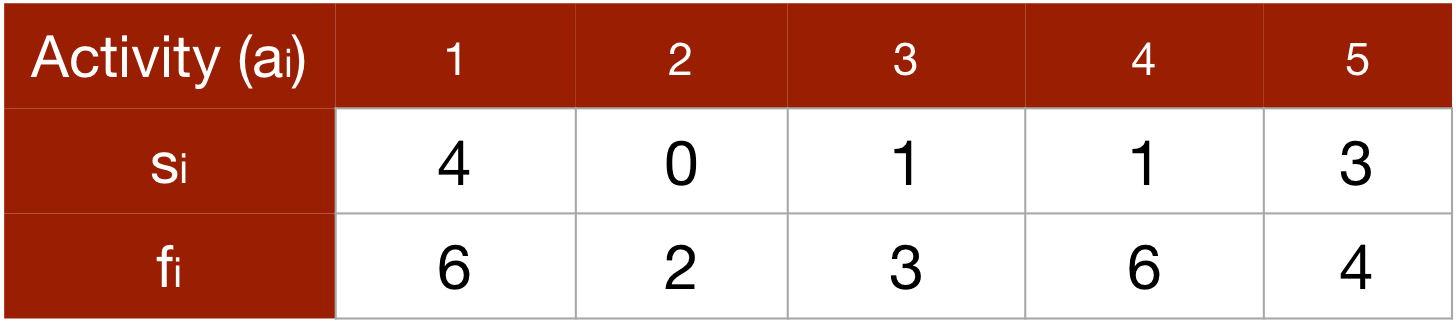

A valid selection is activities 1 and 3. Hoverver, an optimal one is 2, 5, 1.

We can illustrate the problem by drawing each activity as a rectangle whose left
and right $x$-coordinates show the start and finish times. The goal is to find a
largest subset of rectangles that do not overlap vertically.

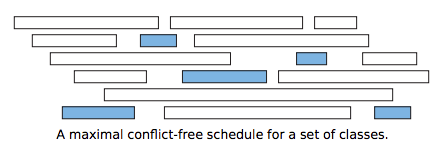

In [1]:
# Select the activity that starts first
#(0, 5) (1, 2) (2, 3) (3, 4)

# Select shortest activities first
#(0, 3) (3, 6) (2, 4)

# Select the activities with less overlaps
#(1, 3) (0, 2) (0, 1) (3, 5) (4, 5)

There is an easy **Greedy algorithm** (you'll learn more in theory lectures soon) to find an optimal solution.

- Sort activities by finishing time;
- Iterate over the activities and select any activity that does not conflict with the previously selected ones.

The algorithm runs in $\Theta(n\log n)$ time.

Your goal is to implement and test this algorithm.

Intuitively, we’d like the first activity to finish as early as possible,
because that leaves us with the most remaining activities.

If this greedy strategy works, it suggests the following very simple
algorithm. Scan through the activities in order of finish time; whenever you
encounter a activity that doesn’t conflict with your latest activity so far, take it!

The above algorithm runs in $\Theta(n\log n)$ time.

To prove that this algorithm actually gives us a maximal conflict-free selection, we use an
*exchange argument*.

We are not claiming that the greedy selection is the only maximal selection; there could be others, e.g., see figure above.

All we can claim is that at least one of the maximal selections is the one that the
greedy algorithm produces.

**Lemma** 
*At least one maximal conflict-free selection includes the activity that finishes first.*

The proof is as follows. 

- Let $f$ be the activity that finishes first. Suppose we have a maximal conflict-free selection $X$ that does not include $f$.

- Let $g$ be the first activity in $X$ to finish.

- Since $f$ finishes before $g$ does, $f$ cannot conflict with any activity in the set $X \setminus \{g\}$.

- Thus, the selection $X' = X \cup \{f\} \setminus \{g\}$ is also conflict-free.

- Since $X'$ has the same size as $X$, it is also maximal.


We use induction to complete the proof.

**Lemma** 
*The greedy selection is an optimal selection.*

The proof is as follows.

- Let $f$ be the activity that finishes first, and let $L$ be the subset of activities the start after $f$ finishes.

- The previous lemma implies that some optimal selection contains $f$, so the best selection that contains $f$ is an optimal selection.

- The best selection that includes $f$ must contain an optimal selection for the activities that do not conflict with $f$, that is, an optimal selection for $L$.

- The greedy algorithm chooses $f$ and then, by the inductive hypothesis, computes an optimal selection of activities from $L$.

**This is a general proof approach** The basic structure of this correctness proof is an inductive exchange argument which applies to several other problems. 

- Assume that there is an optimal solution that is different from the greedy solution.
- Find the ``first'' difference between the two solutions.
- Argue that we can exchange the optimal choice for the greedy choice without degrading the solution.

This argument implies by induction that some optimal solution that contains the entire greedy solution, and therefore equals the greedy solution.

-----

**You goal**: implement the above solution to find the optimal selection from a list of activities, where each activity is a pair. Running time must be $\Theta(n\log n)$.

In [2]:
def activity_selection(activities):
    activities.sort(key=lambda x: x[1])
    selected = set((0,))
    last_selected = 0

    for i in range(1, len(activities)):
        if activities[i][0] >= activities[last_selected][1]:
            selected.add(i)
            last_selected = i
            
    return [activities[i] for i in selected]

In [3]:
import random

def get_rand_activities(n = 10, min_start = 0, max_end = 10):
    activities = list()
    
    for _ in range(n):
        s = random.randint(min_start, max_end-1)
        f = random.randint(s+1, max_end)
        activities.append((s, f))
    return activities

activities = get_rand_activities()
print(f'List of Activities: {activities}\nSelected Activities: {activity_selection(activities)}')

List of Activities: [(8, 9), (7, 8), (3, 10), (9, 10), (4, 7), (4, 9), (9, 10), (9, 10), (7, 8), (5, 7)]
Selected Activities: [(4, 7), (7, 8), (8, 9), (9, 10)]


---

### Exercise: Fractional Knapsack Problem

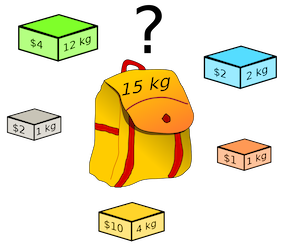

*We are given $n$ items. Each item $i$ has a value $v_i$ and a weight $w_i$. We need put a subset of these items in a knapsack of capacity $W$ to get the maximum total value in the knapsack.*

This is a very popular [problem](https://en.wikipedia.org/wiki/Knapsack_problem).

In the 0-1 Knapsack problem, we are not allowed to break items. We either take the whole item or do not take it.

In Fractional Knapsack, we can break items for maximizing the total value of knapsack.


As an example, consider three items: $v = \{ 60, 100, 120\}$ and $w = \{10, 20, 30\}$ and a knapsack of capacity $W = 50$.

The maximum possible value is $240$ obtained by taking full items of $10$ and $20$ and $2/3$rd of last item of $30$.

An efficient solution to find an optimal selection is to use the greedy approach.

The basic idea of greedy approach is to calculate the ratio value/weight for each item and sort items in decreasing order of this ratio. Then, we take the item with highest ratio and add them until we cannot add the next item as whole and at the end add the next item as much as we can.

This strategy always obtains an optimal solution of this problem.

To see why associate a rectangle to each item. The rectangle of item $i$ has a
base of size $w_i$ and a height of size $v_i$. The diagonal of this rectangle
is a segment of slope $v_i/w_i$.

Consider now any selection of items whose total weight equals $W$.

We can sort the selected items in order of their ratio and draw the diagonals of their rectangles, one after the other.

There cannot exist any assignment whose drawn is above the one of the greedy selection.

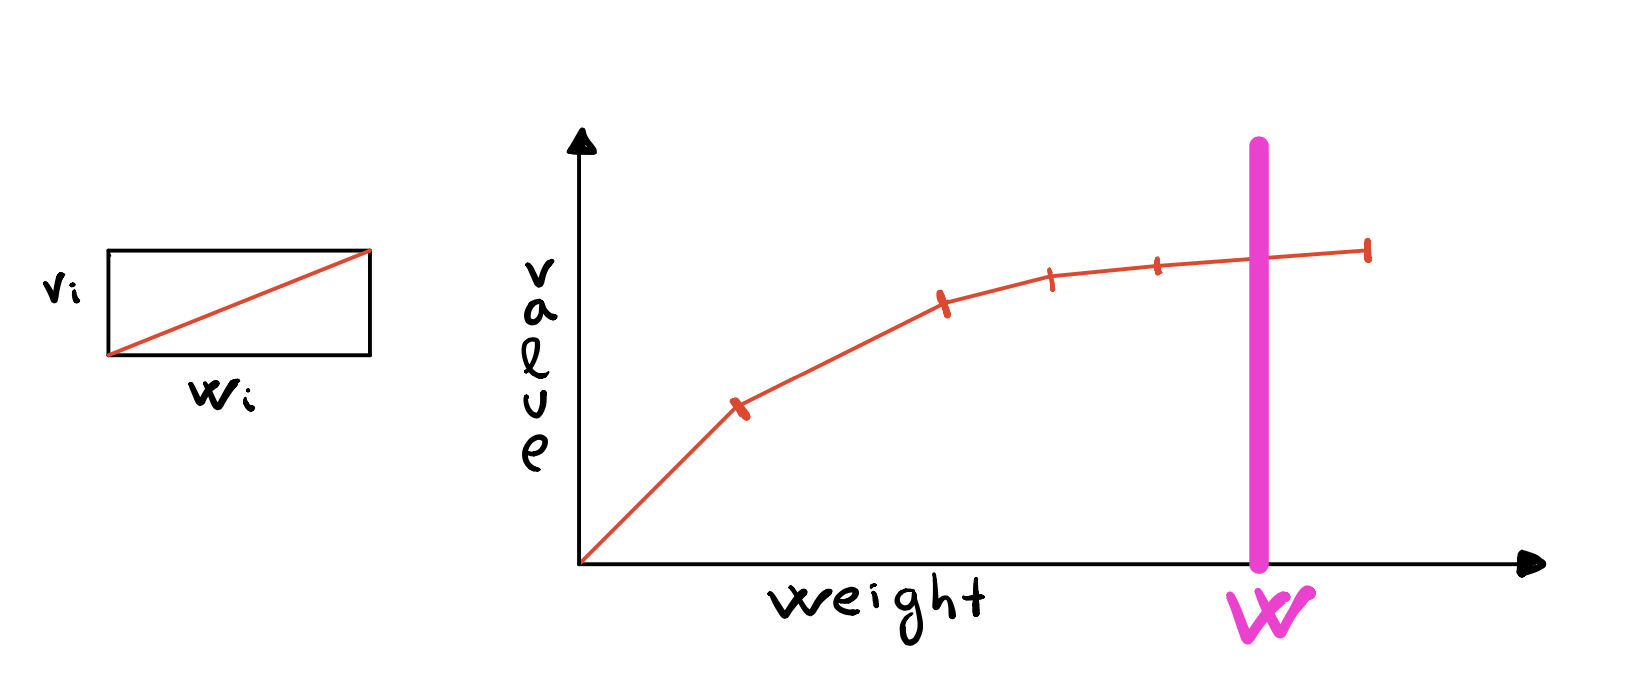

Instead, 0-1 Knapsack problem is NP-Hard.

**Your goal:**
Write a function ```fractional_knapsack(L,W)``` which takes a list L of pairs *(value, weight)* and the capacity $W$ and returns maximum possible value we can obtain by selecting items.  

In [4]:
def fractional_knapsack(L,W):
    L.sort(key = lambda x: -(x[0] / x[1])) #sorting by value / weight ratio in descending order (thus a minus)
    current_weight = 0 #tracking the current weight in the bag
    i = 0 #tracking the index

    while current_weight + L[i][1] < W: #while the sum of current weight and the next weight is lower than W
        current_weight += L[i][1] #add up the next weight to the bag
        i += 1 #move the index to the next item

    current_value = sum([L[x][0] for x in range(i)])
    
    miss_ratio = (W - current_weight) / L[i][1] #computing the next item ratio of missing weight to the maximum capacity
    total_value = current_value + (L[i][0] * miss_ratio) #adding a fraction of the value of the corresponding weight ratio

    return total_value

In [5]:
## Test your implementation here

L = [(60, 10), (100, 20), (120, 30)]

assert fractional_knapsack(L, 50) == 240.0, "Fail!"

L = [(30, 5), (40, 10), (45, 15), (77, 22), (90, 25)]

assert fractional_knapsack(L, 60) == 230.0, "Fail!"

assert fractional_knapsack(L, 15) == 70.0,  "Fail!"

assert fractional_knapsack(L, 10) == 50.0,  "Fail!"